# Predicting Housing Prices with Regression Models
## California Housing Dataset Tutorial
This tutorial demonstrates how to approach a regression task using the California Housing Dataset. The focus is on the impact of feature engineering on model accuracy and includes data preprocessing, model training, hyperparameter tuning, and analysis.

## **1. Load and Explore the Dataset**

In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
california_data = fetch_california_housing(as_frame=True)
df = california_data.frame

# Display basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## **2. Data Preprocessing**
- Handle missing values.
- Scale features to improve model performance.
- Split data into training and testing sets.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **3. Feature Engineering**
Explore correlations between features and the target variable. Create new features if necessary.

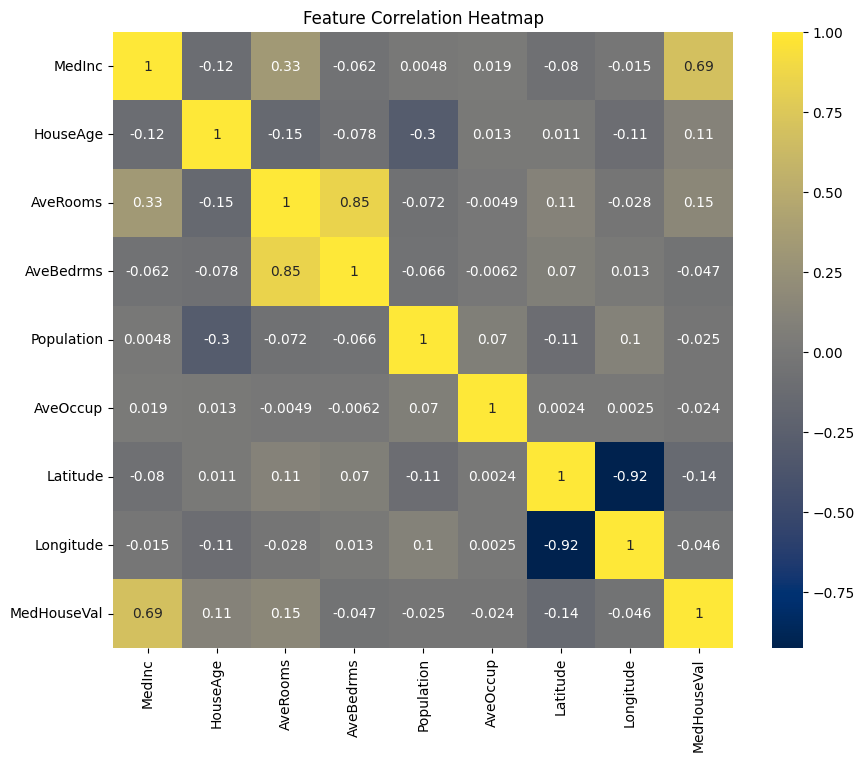

In [24]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
# Use a colorblind-friendly colormap
sns.heatmap(correlation, annot=True, cmap='cividis')  # Colorblind-friendly colormap
plt.title('Feature Correlation Heatmap')
plt.show()


## **4. Model Training and Evaluation**
Train and evaluate different regression models, such as:
- Linear Regression
- Decision Tree Regressor
- Gradient Boosting Regressor.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Train and evaluate Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Train and evaluate Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


print(f'Linear Regression: MSE={mse_lr:.2f}, R2={r2_lr:.2f}')
print(f'Gradient Boosting: MSE={mse_gbr:.2f}, R2={r2_gbr:.2f}')
print(f'Decision Tree Regressor: MSE={mse_tree:.2f}, R2={r2_tree:.2f}')

Linear Regression: MSE=0.56, R2=0.58
Gradient Boosting: MSE=0.29, R2=0.78
Decision Tree Regressor: MSE=0.49, R2=0.62


## **5. Hyperparameter Tuning**
Perform hyperparameter tuning using GridSearchCV for the Gradient Boosting Regressor.
### What is Hyperparameter Tuning? 
Hyperparameter tuning is the process of systematically optimizing the hyperparameters of a machine learning model to improve its performance. Hyperparameters are configuration settings that are external to the model and cannot be learned from the data during training (e.g., learning_rate, n_estimators, and max_depth for Gradient Boosting).

In this specific code snippet, GridSearchCV is used to perform hyperparameter tuning for the Gradient Boosting Regressor. It systematically searches through combinations of hyperparameter values defined in the param_grid to find the optimal configuration that results in the best model performance.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized Gradient Boosting: MSE={mse_best:.2f}, R2={r2_best:.2f}')

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Optimized Gradient Boosting: MSE=0.23, R2=0.82


### Key Components of the Code
Parameter Grid (param_grid): This dictionary defines the range of hyperparameter values to be tested:
- n_estimators: Number of decision trees in the ensemble. Increasing this value allows the model to learn more complex patterns but risks overfitting.
- learning_rate: Controls the step size at each iteration of boosting. Smaller values make the learning process slower but more robust.
- max_depth: The maximum depth of each decision tree. Deeper trees capture more complex patterns but may overfit.

### GridSearchCV:
A cross-validation-based search that evaluates all combinations of hyperparameters in the grid.
The argument cv=3 specifies a 3-fold cross-validation, ensuring the model is tested on different splits of the training data.
scoring='r2' uses the R² metric to evaluate the goodness of fit for each combination.

### Best Model Selection:
After completing the search, grid_search.best_params_ retrieves the combination of hyperparameters that resulted in the highest R² score during cross-validation.

### Performance Evaluation:
The best model is evaluated on the test set using metrics like:
Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
R² Score: Indicates how well the model explains the variance in the target variable.

## **6. Visualizing Results**
Plot predicted vs actual values for the optimized model.

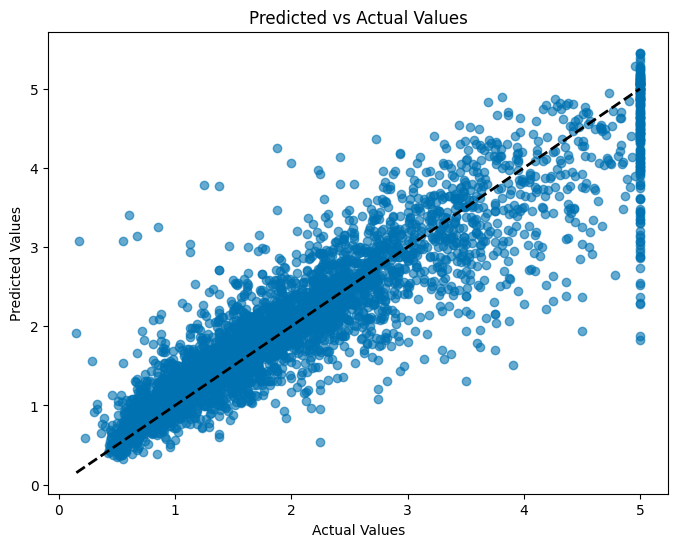

In [27]:
import matplotlib.pyplot as plt

# Use a color from a colorblind-friendly palette
# Example: Using a blue shade
color = "#0072B2"  # A colorblind-friendly blue from Color Brewer

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color=color)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


## **7. Feature Importance Analysis**
For tree-based models like Gradient Boosting, feature importance indicates the relative contribution of each feature to the model's predictions. This helps identify key predictors for housing prices.
### **Feature Importance Calculation in Gradient Boosting**

#### **What is Feature Importance?**
Feature importance is a measure that indicates the relative contribution of each feature to the predictions of a model. In tree-based models like Gradient Boosting, feature importance is calculated based on how often and how effectively a feature is used to split the data at decision nodes. This analysis helps in:
1. Identifying the most significant predictors.
2. Simplifying models by removing less important features.
3. Gaining interpretability by understanding which features influence predictions.

---

### **How Feature Importance is Calculated in Gradient Boosting**
For Gradient Boosting models, feature importance is calculated based on:
1. **Splitting Contribution:** The importance of a feature is determined by how much it reduces the error when used for splitting at decision nodes.
2. **Cumulative Importance:** The model sums the contribution of each feature across all trees in the ensemble.

For example:
- A feature that frequently appears in splits with large reductions in error will have high importance.
- Conversely, a feature rarely used for splitting will have low importance.

The attribute `feature_importances_` in the Gradient Boosting model stores these values a   feature_names = X.columns


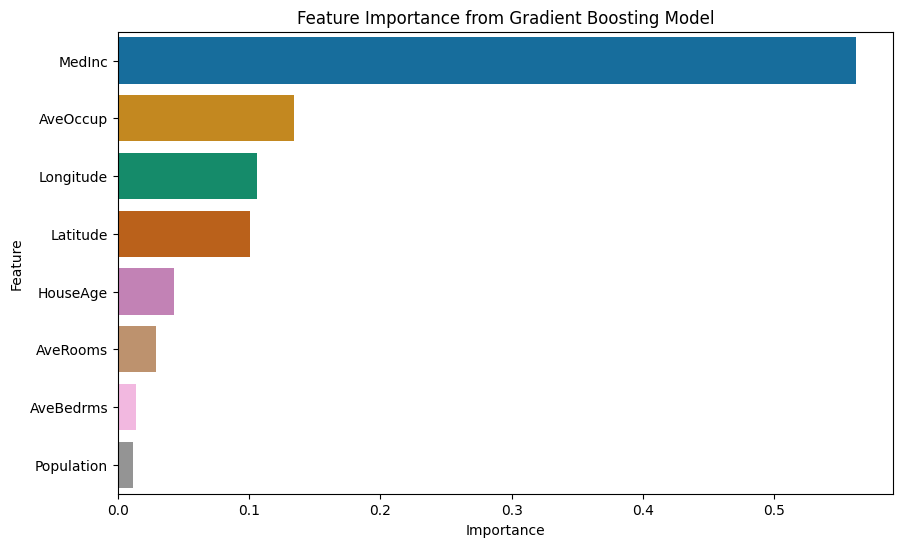

In [28]:
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
# Corrected code to suppress the FutureWarning
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='colorblind')
plt.title('Feature Importance from Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **Insights from Feature Importance**
- Identify which features have the most influence on predicting housing prices.
- Consider focusing on these features for further feature engineering.

### Output Explanation
The bar plot ranks features based on their importance.
Features with longer bars contribute more to the model’s predictions.
For the California Housing Dataset, features like MedInc (median income) are expected to have high importance, as they are strongly correlated with housing prices.


## **8. Additional Visualizations**
### Distribution of Target Variable
Examine the distribution of the target variable (`MedHouseVal`) to understand its range and skewness.

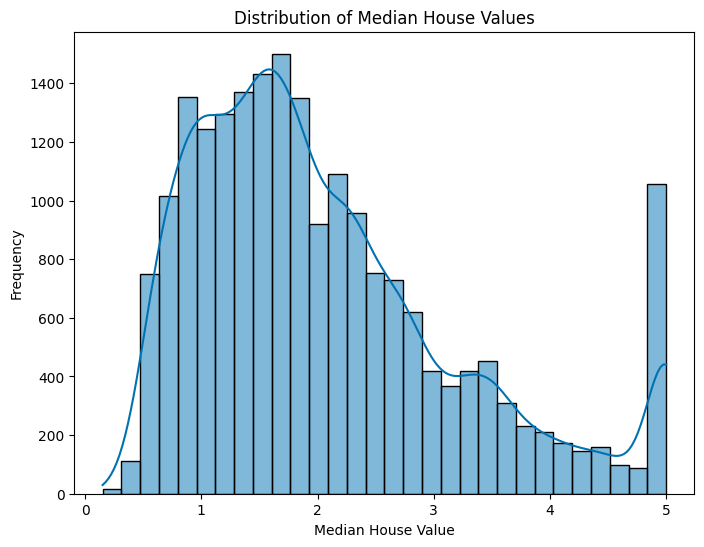

In [29]:
plt.figure(figsize=(8, 6))
# Use a color from a colorblind-friendly palette
sns.histplot(y, kde=True, color='#0072B2', bins=30)  # A colorblind-friendly blue
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


### Pairwise Feature Relationships
Visualize pairwise relationships between features and the target variable to identify potential trends or interactions.

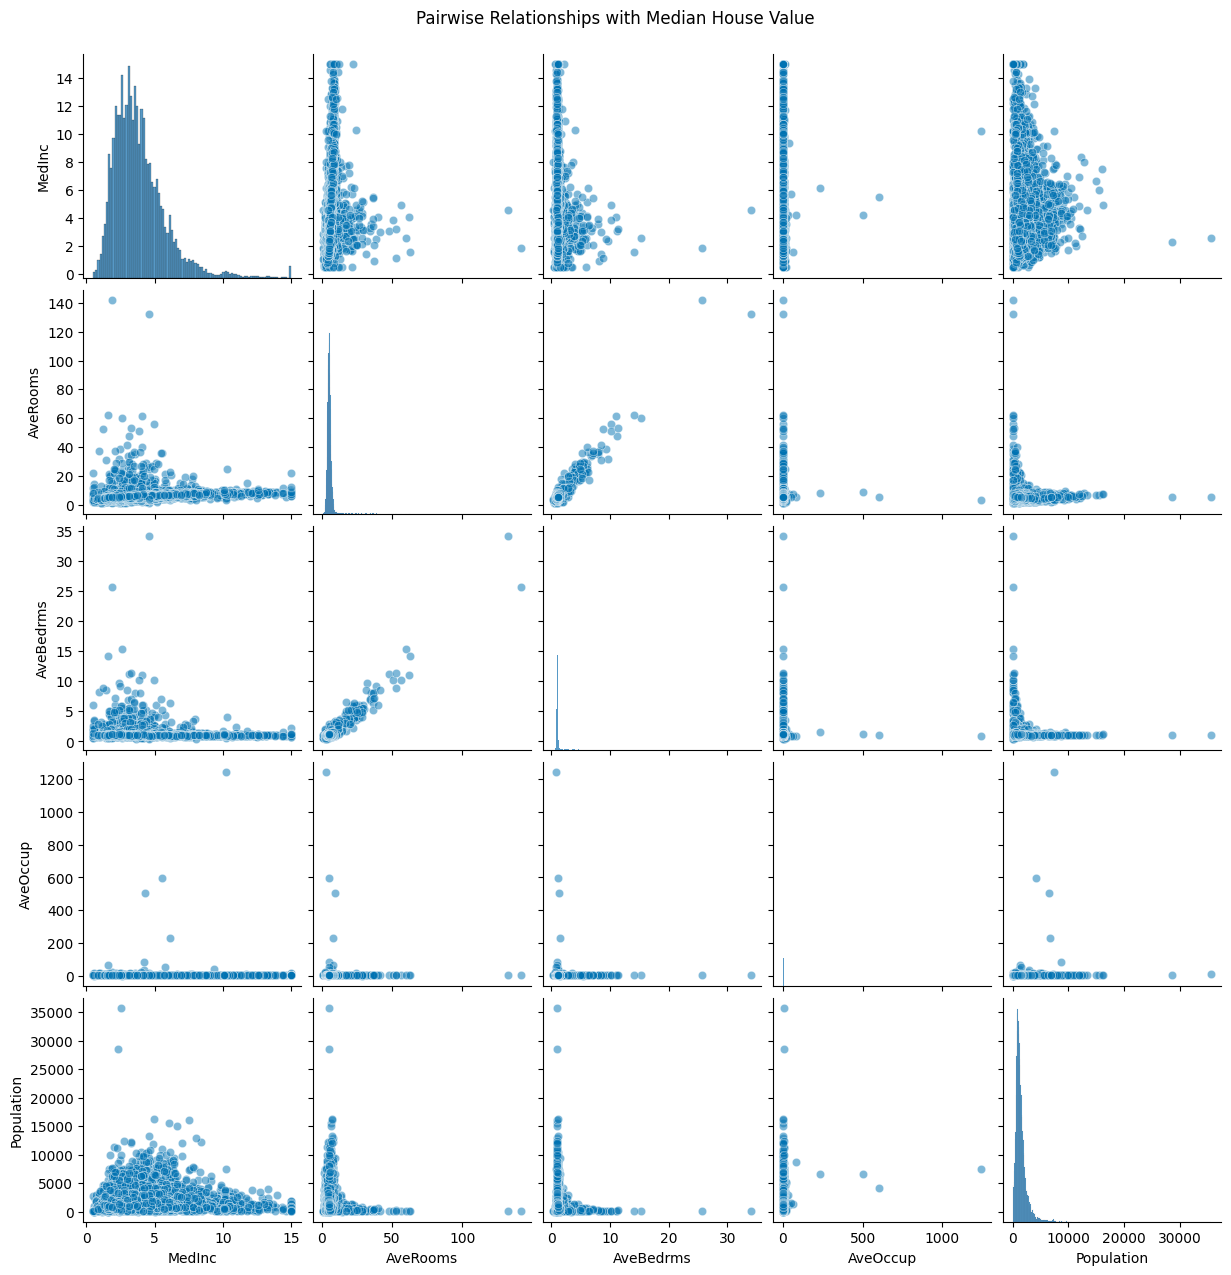

In [30]:
sns.pairplot(
    df,
    vars=['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Population'],
    y_vars='MedHouseVal',
    kind='scatter',
    plot_kws={'alpha': 0.5, 'color': '#0072B2'}  # A colorblind-friendly blue
)
plt.suptitle('Pairwise Relationships with Median House Value', y=1.02)
plt.show()


### Residual Analysis
Examine the residuals (differences between actual and predicted values) to assess model performance and identify any patterns.

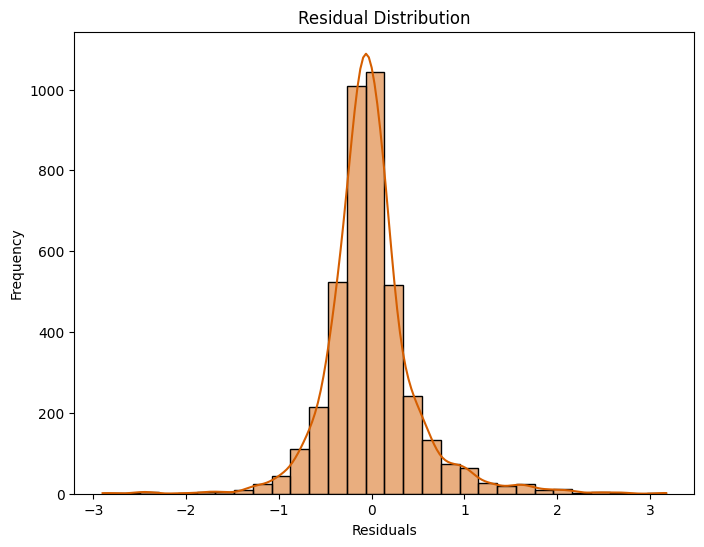

In [31]:
residuals = y_test - y_pred_best

plt.figure(figsize=(8, 6))
# Use a colorblind-friendly color
sns.histplot(residuals, kde=True, color='#D55E00', bins=30)  # A colorblind-friendly orange
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


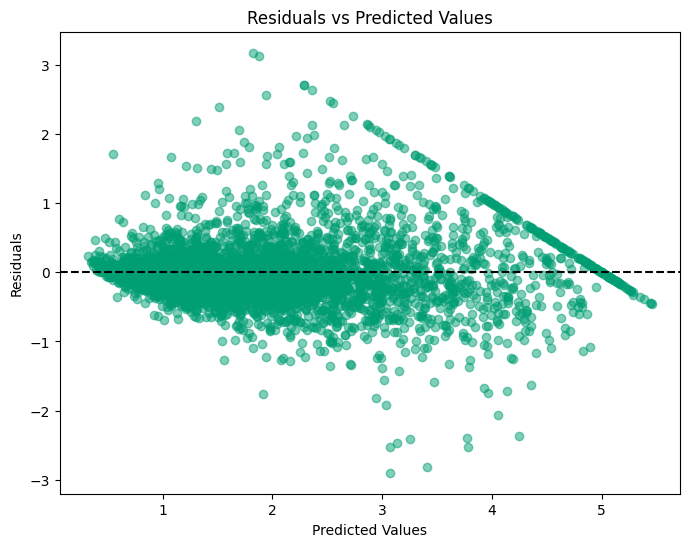

In [32]:
plt.figure(figsize=(8, 6))
# Use a colorblind-friendly color
plt.scatter(y_pred_best, residuals, alpha=0.5, color='#009E73')  # A colorblind-friendly green
plt.axhline(0, linestyle='--', color='black')  # Horizontal line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### **Takeaway from Residual Analysis**
- Residuals should ideally be randomly distributed around zero.
- Any visible patterns might indicate areas where the model could be improved.


# **California Housing Dataset: A Comprehensive Tutorial**
This tutorial provides a step-by-step guide to predicting housing prices using regression models. Each section explains the rationale behind the steps, methods used, and their importance in solving the problem.

### **Use Case**: Predict housing prices.  
### **Focus Idea**: Demonstrate how feature engineering impacts model accuracy and interpretability.

---

## **1. Load and Explore the Dataset**

### Objective:
The first and most critical step in any data science workflow is understanding the data you are working with. This step involves loading the dataset and exploring its structure, including the features, target variable, and overall data distribution.

### Steps:
1. **Load the California Housing Dataset**:
   - This dataset is part of Scikit-learn's built-in datasets and contains information about housing prices in California based on several features, such as median income (`MedInc`), average number of rooms (`AveRooms`), and others.
   - The target variable (`MedHouseVal`) represents the median house value in California districts.

2. **Explore the Dataset**:
   - Using methods like `.head()` to view the first few rows helps understand the dataset structure.
   - `.info()` provides details about the data types and the presence of null values.
   - `.describe()` calculates summary statistics such as mean, median, standard deviation, and range.

### Why It’s Important:
- Understanding the data ensures that you are aware of potential challenges, such as missing values, outliers, or categorical data.
- It provides insights into the dataset's scale and whether feature scaling will be necessary.
- This foundational step avoids errors later and sets the stage for effective preprocessing.

---

## **2. Data Preprocessing**

### Objective:
Prepare the dataset for modeling by cleaning and transforming the data into a suitable format for machine learning algorithms.

### Steps:
#### **1. Handle Missing Values**:
- Missing values, if any, can disrupt model training and reduce performance. In the California Housing Dataset, missing values are uncommon but should always be checked.
- Approaches:
  - Imputation (filling missing values with mean/median/mode).
  - Dropping rows/columns with missing data (only if the proportion is very small).

#### **2. Scale Features**:
- Why? Many machine learning algorithms are sensitive to the scale of features. For example, Linear Regression and Gradient Boosting perform better when all features are on the same scale.
- How? Use `StandardScaler` to standardize the dataset so that all features have a mean of 0 and a standard deviation of 1.

#### **3. Split Data into Training and Testing Sets**:
- Why? Splitting the data ensures that the model is evaluated on unseen data, preventing overfitting.
- The dataset is split into 80% training and 20% testing data using Scikit-learn’s `train_test_split`.

### Why It’s Important:
Data preprocessing improves data quality and ensures that machine learning models are trained effectively without bias from scaling issues or missing values. It also creates a framework for fair model evaluation.

---

## **3. Feature Engineering**

### Objective:
Feature engineering is the process of creating new features or modifying existing ones to enhance the predictive power of the model.

### Steps:
#### **1. Correlation Analysis**:
- Use a heatmap to visualize the correlation between features and the target variable (`MedHouseVal`).
- Features with strong positive or negative correlations (e.g., `MedInc`) are likely to be good predictors of the target variable.

#### **2. Create New Features**:
- Domain knowledge can guide the creation of new features. Examples:
  - `RoomsPerHousehold` = `AveRooms / Households`.
  - `PopulationPerHousehold` = `Population / Households`.
- These derived features may capture relationships not evident in the raw data.

### Why It’s Important:
Feature engineering enables models to focus on meaningful patterns in the data. It can significantly improve accuracy by emphasizing key aspects of the data.

---

## **4. Model Training and Evaluation**

### Objective:
Train and compare multiple regression models to predict housing prices and identify the best-performing algorithm.

### Models Used:
1. **Linear Regression**:
   - Assumes a linear relationship between features and the target variable.
   - Provides a simple baseline model for comparison.

2. **Decision Tree Regressor**:
   - Captures non-linear relationships by splitting the data into subsets based on feature thresholds.
   - May overfit without proper tuning.

3. **Gradient Boosting Regressor**:
   - An ensemble method that combines weak learners (decision trees) to create a strong model.
   - Excels at capturing complex patterns in the data.

### Evaluation Metrics:
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower values indicate better performance.
- **R-Squared (R²)**: Indicates how well the model explains the variance in the target variable. Higher values (closer to 1) are better.

### Why It’s Important:
Training multiple models allows us to compare their performance and select the best approach for the dataset. It also provides insights into how different algorithms handle the data.

---

## **5. Hyperparameter Tuning**

### Objective:
Optimize the Gradient Boosting Regressor by fine-tuning its hyperparameters to achieve the best performance.

### Steps:
1. Define a parameter grid (e.g., `n_estimators`, `learning_rate`, `max_depth`).
2. Use `GridSearchCV` to evaluate all parameter combinations using cross-validation.
3. Select the best parameters based on the highest cross-validation score.

### Why It’s Important:
Hyperparameter tuning balances model complexity and generalization, improving both accuracy and robustness.

---

## **6. Visualizing Results**

### Predicted vs Actual Values:
- Plot the predicted values against the actual values to assess model performance visually.
- Points closer to the diagonal line indicate better predictions.

### Why It’s Important:
This visualization provides a quick and intuitive way to evaluate model accuracy and detect potential systematic errors.

---

## **7. Feature Importance Analysis**

### Objective:
Identify the most influential features in the Gradient Boosting model.

### Steps:
1. Extract feature importance scores from the model.
2. Visualize the scores using a barplot to rank features by their importance.

### Insights:
- Features like `MedInc` often have the highest importance scores.
- These insights can guide future feature engineering efforts.

### Why It’s Important:
Feature importance analysis helps in interpreting the model and understanding the key drivers of housing prices.

---

## **8. Additional Visualizations**

### Distribution of Target Variable:
- Plot the histogram of `MedHouseVal` to understand its range and skewness.
- Skewness indicates whether transformations (e.g., log scaling) might be needed.

### Pairwise Feature Relationships:
- Scatter plots between features and the target variable highlight trends or non-linear relationships.

### Residual Analysis:
- Residual plots and histograms evaluate whether the model is biased or missing patterns in the data.
- Ideally, residuals should be randomly distributed around zero.

### Takeaway:
Residual analysis provides insights into model performance and areas for improvement, such as better feature engineering or more complex models.

---

## **Conclusion**
This tutorial covered the complete pipeline for predicting housing prices, from loading and preprocessing the data to model evaluation and interpretation. Key takeaways include:
1. The importance of preprocessing and feature engineering.
2. Gradient Boosting outperformed simpler models like Linear Regression.
3. Visualizations like feature importance and residual plots provided critical insights.

Future directions could explore advanced techniques such as neural networks or more sophisticated feature engineering.
